In [229]:
import pandas as pd

In [230]:
df = pd.read_csv('data/recetas.csv', sep=';')

In [231]:
df.head()

,Id,Categoria,Nombre,Valoracion,Dificultad,Num_comensales,Tiempo,Tipo,Link_receta,Num_comentarios,Num_reviews,Fecha_modificacion,Ingredientes
0,74138,Recetas de Aperitivos y tapas,Receta de Baleadas hondureñas,NaN,baja,2.0,10m,NaN,https://www.recetasgratis.net/receta-de-balead...,0,0,6/4/20,"tortillas de harina,2 tazas de frijoles negros..."
1,74133,Recetas de Aperitivos y tapas,Receta de Tacos de carne molida,NaN,baja,4.0,30m,Plato principal,https://www.recetasgratis.net/receta-de-tacos-...,0,0,27/3/20,"500 gramos de carne molida,1 papa mediana,2 cu..."
2,74154,Recetas de Aperitivos y tapas,Receta de Burritos norteños,NaN,muy baja,5.0,30m,Entrante,https://www.recetasgratis.net/receta-de-burrit...,0,0,25/3/20,"10 tortillas de harina para burritos,500 gramo..."
3,74146,Recetas de Aperitivos y tapas,Receta de Croquetas de pollo caseras de la abuela,NaN,baja,4.0,45m,Entrante,https://www.recetasgratis.net/receta-de-croque...,0,0,24/3/20,"1 pechuga de pollo cocida y troceada,1 pellizc..."
4,74081,Recetas de Aperitivos y tapas,Receta de Masa para empanadas fritas,NaN,baja,3.0,30m,Entrante,https://www.recetasgratis.net/receta-de-masa-p...,0,0,3/3/20,"3 tazas de harina de trigo (420 gramos),1 pizc..."


In [232]:
df.shape

(22374, 13)

In [233]:
df.describe()

,Id,Valoracion,Num_comensales,Num_comentarios,Num_reviews
count,22374.000000,17602.000000,12921.000000,22374.000000,22374.000000
mean,41573.268705,3.955005,4.687408,5.277197,3.617547
std,19729.639161,0.750390,3.829336,24.588849,2.479689
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24697.250000,3.400000,2.000000,0.000000,2.000000
50%,46444.000000,4.000000,4.000000,1.000000,4.000000
75%,58345.750000,4.500000,6.000000,3.000000,5.000000
max,74200.000000,5.000000,100.000000,797.000000,9.000000


In [234]:
df.dtypes

Id                      int64
Categoria              object
Nombre                 object
Valoracion            float64
Dificultad             object
Num_comensales        float64
Tiempo                 object
Tipo                   object
Link_receta            object
Num_comentarios         int64
Num_reviews             int64
Fecha_modificacion     object
Ingredientes           object
dtype: object

In [235]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Dificultad'>

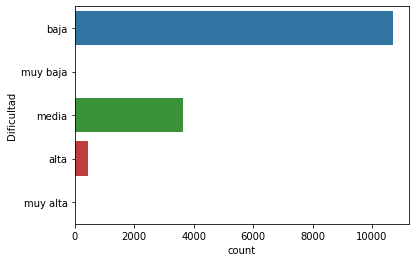

In [236]:
sns.countplot(y=df['Dificultad'])

In [250]:
from itertools import islice

In [237]:
df.isnull().sum()

Id                        0
Categoria                 0
Nombre                    0
Valoracion             4772
Dificultad             7529
Num_comensales         9453
Tiempo                 9455
Tipo                  10925
Link_receta               0
Num_comentarios           0
Num_reviews               0
Fecha_modificacion    11086
Ingredientes            224
dtype: int64

In [238]:
# percentage
df.isnull().sum() * 100 / len(df)

Id                     0.000000
Categoria              0.000000
Nombre                 0.000000
Valoracion            21.328328
Dificultad            33.650666
Num_comensales        42.249933
Tiempo                42.258872
Tipo                  48.828998
Link_receta            0.000000
Num_comentarios        0.000000
Num_reviews            0.000000
Fecha_modificacion    49.548583
Ingredientes           1.001162
dtype: float64

In [239]:
'''
considero que hay que quitar los nans de 
1. los ingredientes, si no aparecen no nos sirven
2. 
'''

'\nconsidero que hay que quitar los nans de \n1. los ingredientes, si no aparecen no nos sirven\n2. \n'

In [240]:
# mejor no dropearlos, directamente no los seleccionamos
df = df[df['Ingredientes'].notna()]

In [241]:
missing_value_df.sort_values('percent_missing', inplace=True)

In [242]:
df.isnull().sum()

Id                        0
Categoria                 0
Nombre                    0
Valoracion             4703
Dificultad             7386
Num_comensales         9305
Tiempo                 9307
Tipo                  10768
Link_receta               0
Num_comentarios           0
Num_reviews               0
Fecha_modificacion    11081
Ingredientes              0
dtype: int64

In [243]:
df.shape

(22150, 13)

In [244]:
df.Ingredientes

0        tortillas de harina,2 tazas de frijoles negros...
1        500 gramos de carne molida,1 papa mediana,2 cu...
2        10 tortillas de harina para burritos,500 gramo...
3        1 pechuga de pollo cocida y troceada,1 pellizc...
4        3 tazas de harina de trigo (420 gramos),1 pizc...
                               ...                        
22369    4-6 cucharadas de queso parmesano rallado,500 ...
22370    1 palta,1 pechuga de pollo,1 zanahoria,1 cebol...
22371    6 fondos de alcachofa,300 gr. de agua mineral,...
22372    ½ taza de la lechera,1 taza de leche entera,1 ...
22373    1 aguacate grande,1 plátano,2 cucharadas cafet...
Name: Ingredientes, Length: 22150, dtype: object

LIMPIEZA

numeros
parentesis
medidas con ‘de’

In [245]:
listaingredientes = list(df[df['Ingredientes'].notna()].Ingredientes)
sumaingredientes = 0
for receta in listaingredientes:
    for ingrediente in receta.split(','):
      sumaingredientes += 1
sumaingredientes

191444

In [246]:
lista_limpia = []
for receta in listaingredientes:
  l3 = []
  #limpiamos los números al inicio
  for ingrediente in receta.split(','):
    if re.findall("\d", ingrediente.split(' ')[0]) or re.findall("[½¼⅓]", ingrediente.split(' ')[0]):    
      l3.append(" ".join(ingrediente.split()[1:]))
    else:
      l3.append(" ".join(ingrediente.split()))
  #miramos y limpiamos si solo hay un número o nada dentro del ingrediente y por tanto no es un ingrediente   (ej: ',8,'  ',1,'  ',,')
  for ingrediente in l3:
    if re.findall("[a-zA-Z]", ingrediente):
      lista_limpia.append(ingrediente)
  l3.clear()
  #limpiamos parentesis
  

In [247]:
len(lista_limpia)

190866

In [248]:
lista_limpia

['tortillas de harina',
 'tazas de frijoles negros cocidos',
 'aguacates',
 'gramos de queso rallado',
 'cucharadas soperas de crema agria',
 'gramos de carne molida',
 'papa mediana',
 'cucharadas soperas de puré de tomate concentrado',
 'cebolla blanca',
 'diente de ajo',
 'aceitunas verdes sin hueso y rellenas de pimiento',
 'cucharadita de orégano',
 'cucharadita de pimentón picante (puede ser dulce)',
 'cucharadita de comino',
 'onzas de tequila blanco',
 'puñado de perejil fresco',
 'mililitros de aceite de oliva',
 'pizca de sal y pimienta',
 'cebolla morada',
 'jitomate',
 'chile serrano',
 'puñado de cilantro',
 'limón verde',
 'mililitros de aceite de oliva',
 'aguacate',
 'hojas de lechuga',
 'taza de crema ácida',
 'docena de tortillas de maíz',
 'tortillas de harina para burritos',
 'gramos de chorizo',
 'tazas de frijoles molidos',
 'taza de queso de hebra',
 'taza de lechuga rebanada',
 'cucharadas soperas de cebolla blanca picada',
 'pizca de sal',
 'pechuga de pollo co

In [249]:
l3 = []
l4 = []
for ingrediente in lista_limpia:
  if re.findall("[a-zA-Z]", ingrediente):
    l3.append(ingrediente)
  else:
    l4.append(ingrediente)
len(l3)



190866